In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['axes.grid'] = False

In [2]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
end = datetime.date(2021, 12, 6)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2021-12-02,56522.1483
2021-12-03,53671.9900
2021-12-04,49247.4233


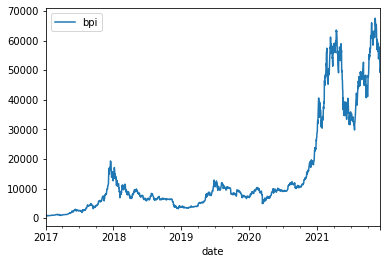

In [4]:
data.plot()

D	Calendar day	

B	Business day

W	Weekly		

M	Month

Q	Quarter

A	Year end

H	Hours

T	Minutes		

S	Seconds		


In [5]:
data.resample('Q').mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


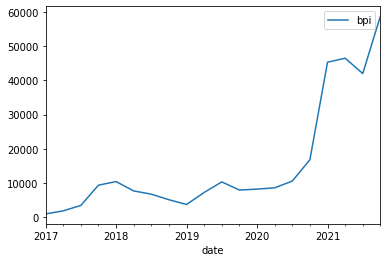

In [6]:
data.resample('Q').mean().plot()

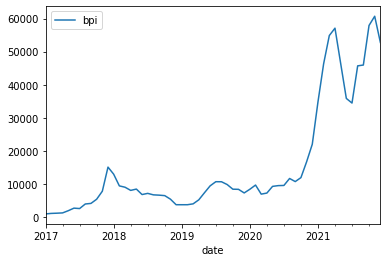

In [7]:
data.resample('M').mean().plot()

In [8]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


**DataFrame.diff(periods=1, axis=0) First discrete difference of element.**

Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row).

In [9]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [10]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


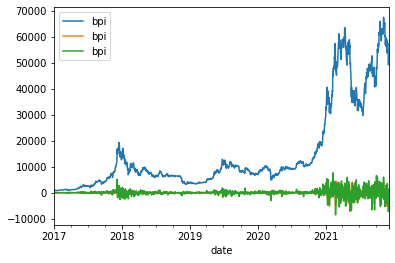

In [11]:
pd.concat([data['bpi'], data['bpi'].diff(), data['bpi'].diff(2)], axis=1).plot()
plt.show()

In [12]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


 
**DataFrame.shift(periods=1, freq=None, axis=0, fill_value=NoDefault.no_default)** 

Shift index by desired number of periods with an optional time freq.

When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq. freq can be inferred when specified as “infer” as long as either freq or inferred_freq attribute is set in the index.

In [13]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [14]:
data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [15]:
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [16]:
data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


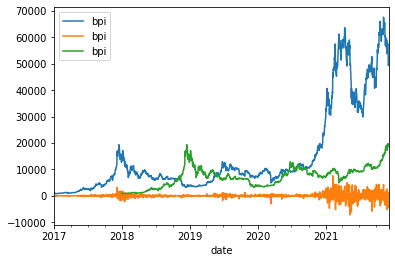

In [17]:
pd.concat([data, data-data.shift(), data.shift(365)], axis=1).plot()

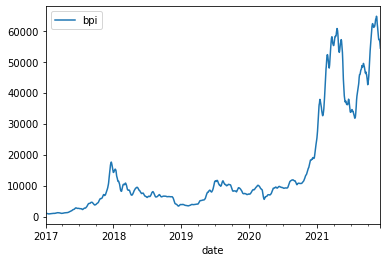

In [18]:
data.rolling(window=10).mean().plot()

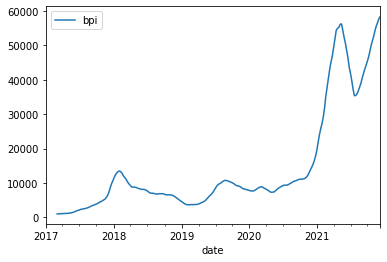

In [19]:
data.resample('W').mean().rolling(window=10).mean().plot()

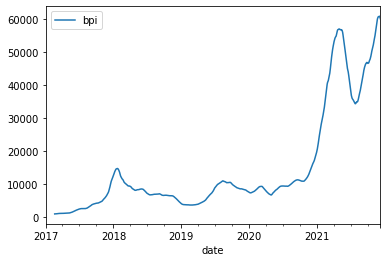

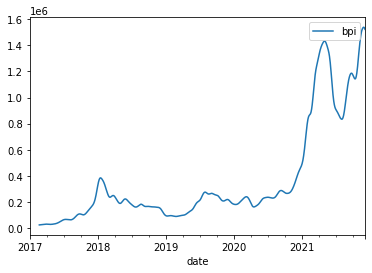

In [20]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()  # exponential moving average

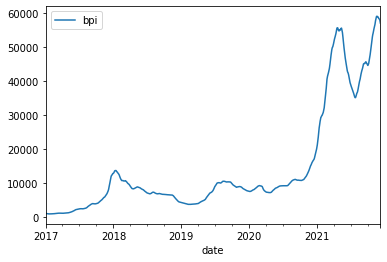

In [21]:
data.ewm(span=50).mean().plot()

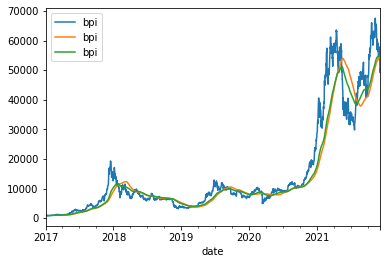

In [22]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()

In [23]:
data.groupby(data.index.dayofweek).mean()

,bpi
date,
0,15083.826653
1,14930.027330
2,14998.183975
3,14983.274285
4,15061.292906
5,15089.683388
6,15041.696593


In [24]:
data.groupby(data.index.month).mean()

,bpi
date,
1,12130.881688
2,13989.941464
3,15165.095852
4,15745.089671
5,14663.634014
6,12828.100683
7,12854.792858
8,15711.327941
9,15422.166896


In [25]:
data.groupby(data.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,11110.755804
2021,47348.791963


In [26]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [27]:
data[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [28]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


**DataFrame.pct_change(periods=1, fill_method='pad', limit=None, freq=None, **kwargs)**
Percentage change between the current and a prior element.

Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.

In [29]:
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [30]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [31]:
data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
